In [17]:
!pip install ipympl
!pip install widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

from math import pi, sin, cos

%matplotlib widget

from google.colab import output
output.enable_custom_widget_manager()

ERROR: Could not find a version that satisfies the requirement widget (from versions: none)
ERROR: No matching distribution found for widget


In [18]:
# Ângulo de lançamento em graus
angulo_graus = 45.0

# Velocidade inicial
velocidade_inicial = 10.0

# Aceleração da gravidade (m/s^2)
g = 9.81

# Tempo de simulação (segundos)
tempo_simulacao = 2.0

# Intervalo de atualização da animação (ms)
intervalo_atualizacao = 20

# Convertendo o ângulo para radianos
angulo_radianos = angulo_graus * pi / 180.0


In [19]:
def gerar_trajetoria(tempo):
    x = velocidade_inicial * cos(angulo_radianos) * tempo
    y = velocidade_inicial * sin(angulo_radianos) * tempo - 0.5 * g * tempo**2
    return x, y

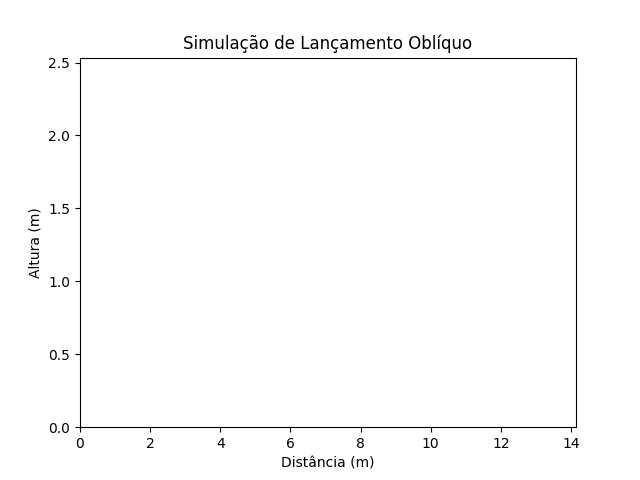

In [20]:
fig, ax = plt.subplots()

# Geração da trajetória
tempo = np.linspace(0.0, tempo_simulacao, int(tempo_simulacao / intervalo_atualizacao * 100))
x, y = gerar_trajetoria(tempo)

# Objeto do gráfico da trajetória (criado vazio por enquanto)
linha, = ax.plot([], [], 'o-', lw=2, color='red')

# Configuração dos limites dos eixos
ax.set_xlim(0, x.max())
ax.set_ylim(0, y.max())
ax.set_xlabel('Distância (m)')
ax.set_ylabel('Altura (m)')
ax.set_title('Simulação de Lançamento Oblíquo')

# Função para inicializar a animação
def init():
    linha.set_data([], [])
    return linha,

# Função para animar (será chamada repetidamente)
def animate(i):
    linha.set_data(x[:i], y[:i])
    return linha,

# Criação da animação
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(tempo), interval=intervalo_atualizacao, blit=True)

plt.show()


Support for third party widgets will remain active for the duration of the session. To disable support: